# FROM Umar Mansyur ~ Ustad Dev

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataFrame = pd.read_csv('../Dataset/penjualan_beras.csv', sep=';');
dataFrame.head()

,X (Harga per Kilogram),Total Harga
0,10000,50000
1,12000,36000
2,15000,30000
3,11000,44000
4,13000,26000


In [5]:
x = dataFrame.iloc[:, :-1].values
y = dataFrame.iloc[:, 1].values


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict([[30000]])
y_pred

array([114530.24269844])

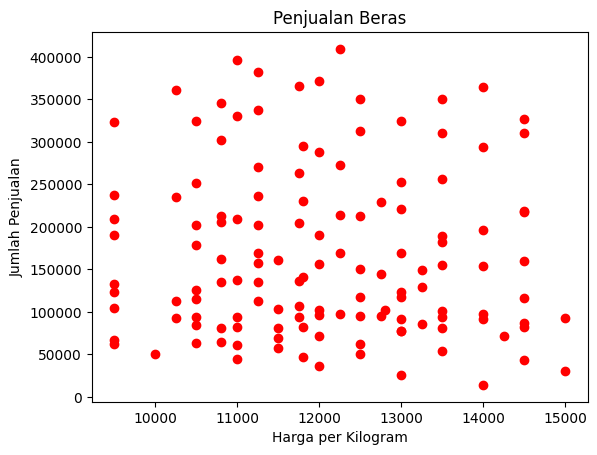

In [11]:
plt.scatter(dataFrame['X (Harga per Kilogram)'], dataFrame['Total Harga'], color='red')
plt.xlabel('Harga per Kilogram')
plt.ylabel('Jumlah Penjualan')
plt.title('Penjualan Beras')
plt.show()

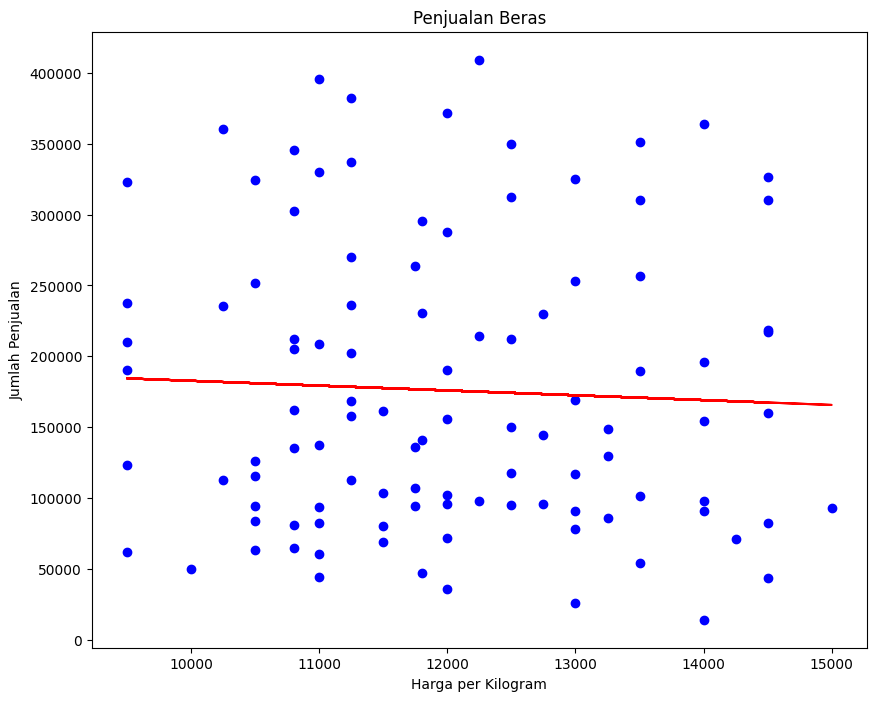

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(x_train, y_train, color='blue')

plt.plot(x_train, regressor.predict(x_train), color='red')
plt.xlabel('Harga per Kilogram')
plt.ylabel('Jumlah Penjualan')
plt.title('Penjualan Beras')
plt.show()
